# KERAS OPTIMIZATION METHOD TEST  (2018/5/20)

In [5]:
dlist=[float(d) for d in open('data.txt','r')]
print(dlist)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0]


In [6]:
dlist=dlist+np.random.randn(len(dlist))*.1

In [1]:
from keras.layers import Dense
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

C:\Users\dn\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
noptim=4
optim=["SGD","Adadelta","Adagrad","Nadam"]
#"RMSprop","Adam","Adamax"
#,"TFOptimizer"
optim

nactive=10
activemtd=["softmax","elu","selu","softplus","softsign","relu","tanh","sigmoid","hard_sigmoid","linear"]

nsweep=nactive


In [25]:
import timeit
start_time = timeit.default_timer()
ioptim=3  # use Nadam
iactiv2=5 #  reluが一番良かった
losstot=[];dlisttot=[]
for isweep in range(nsweep):
    model1=Sequential()
    model1.add(Dense(input_dim=1,units=2,activation=activemtd[isweep]))
    model1.add(Dense(units=1,activation=activemtd[iactiv2]))       
    #model1.summary()
    model1.compile(optimizer=optim[ioptim],loss='mse',metrics=['accuracy'])
    hist=model1.fit(dlist,dlist,epochs=100, verbose=0)
    losstot += [hist.history['loss']]
    dlisttot += [model1.predict(dlist).reshape(-1,).tolist()]

# code you want to evaluate
print("elapsed time=", timeit.default_timer() - start_time)

elapsed time= 19.39338825013806


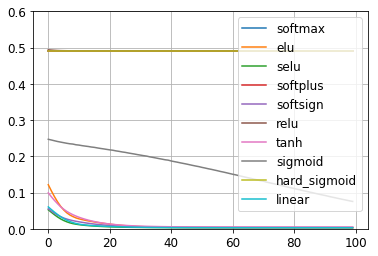

In [27]:
plt.rcParams["font.size"] = 12
for i in range(nsweep):
    plt.plot(losstot[i],label=activemtd[i])
plt.grid(True)
plt.ylim([0,.6])
plt.legend()
plt.show()

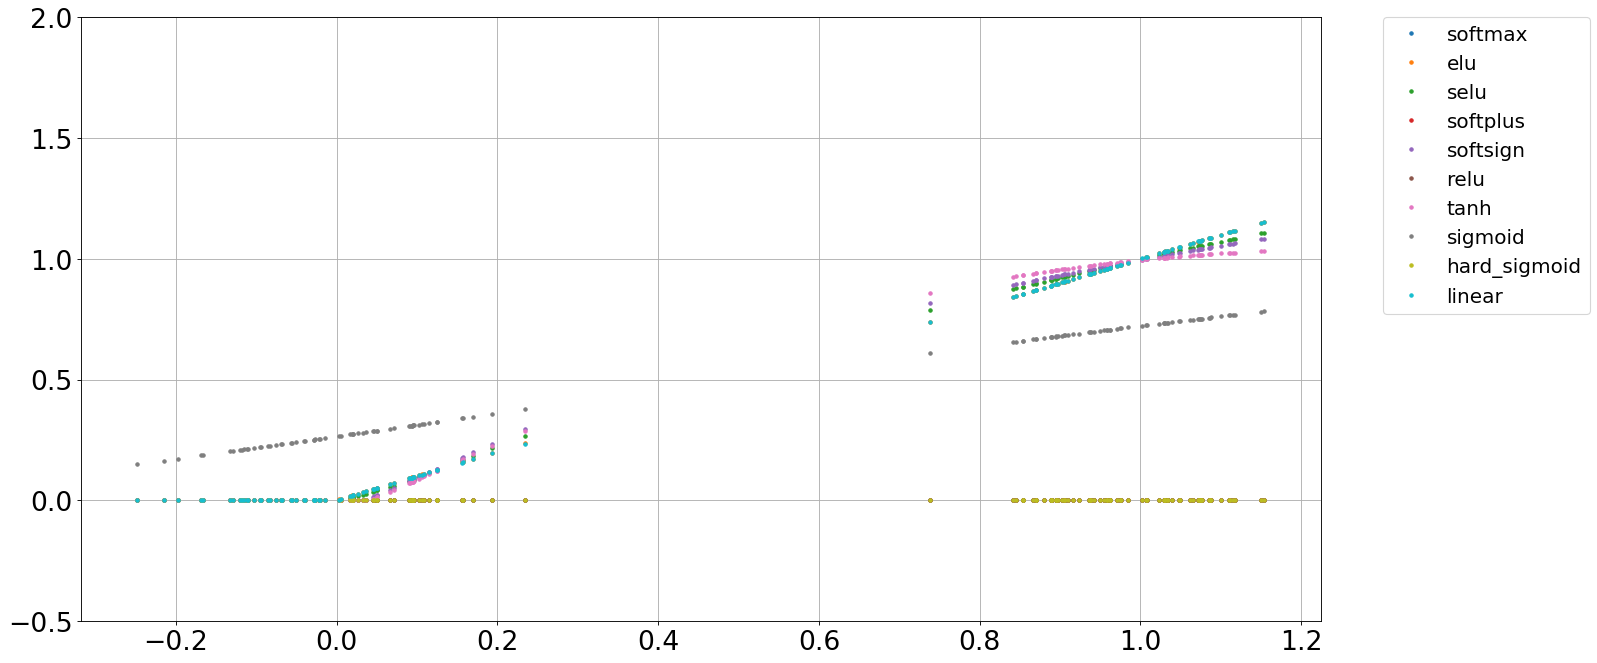

In [28]:
#plt.plot(dlist,list(map(list, zip(*dlisttot))),'.',label="RMSprop")      # リストを転置してプロット
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams["font.size"] = 24
for i in range(nsweep):
    plt.plot(dlist,dlisttot[i],'.',label=activemtd[i])
plt.ylim([-.5,2])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
plt.grid(True)
plt.show()